In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Customer Churn.csv')
df
#df.head() for five rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0") # Rerplace space with 0 due to total charges
df["TotalCharges"] = df["TotalCharges"].astype("float") # convert the column to floats 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull() # isnull state where is null values

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum().sum() # Shows the null values

np.int64(0)

In [ ]:
df.describe() # for descriptive analysis

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
df.duplicated().sum() # for duplication on row basis

np.int64(0)

In [ ]:
df["customerID"].duplicated().sum() # duplicate check on Unique ID basis

np.int64(0)

In [ ]:
def conv(value):    # function for SeniorCitizen is exist return value in yes or no
    if value == 1:
        return "yes"
    else:
        return "no"
    
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)


In [ ]:
df.head(25) # Display Only for 25 rows if you want only 5 rows you can df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


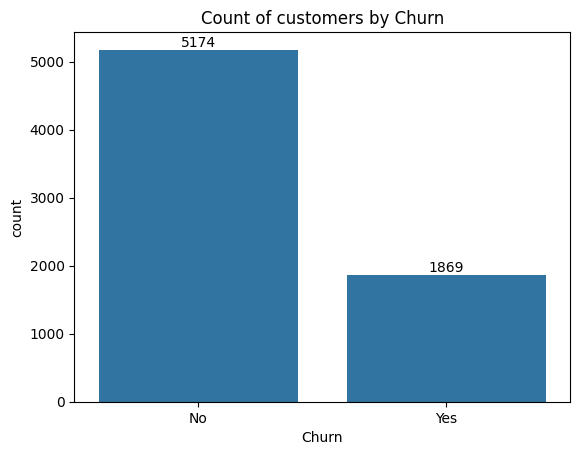

In [ ]:
ax = sns.countplot(x = 'Churn', data =df)

ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

In [ ]:
gb = df.groupby("Churn").agg({'Churn':"count"})
gb 
#plt.pie('churn')
#plt.show()

,Churn
Churn,
No,5174
Yes,1869


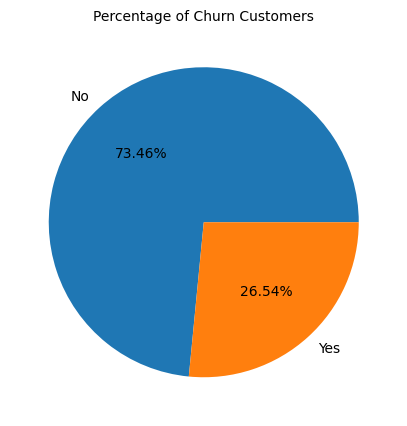

,Churn
Churn,
No,5174
Yes,1869


In [ ]:
plt.figure(figsize = (5,7.5))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churn Customers", fontsize = 10)
plt.show()
gb

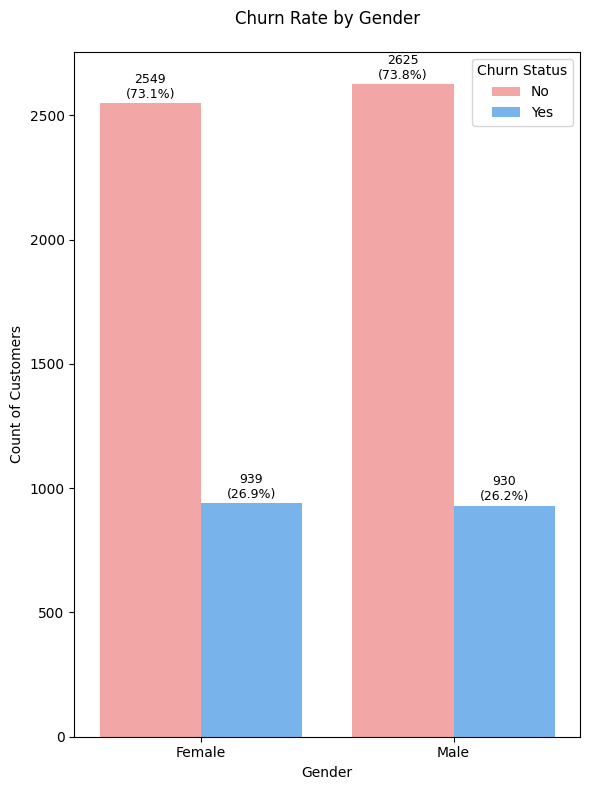

In [ ]:
"""plt.figure(figsize=(6, 5))
ax = sns.countplot(x="gender", data=df, hue="Churn", palette=["#ff9999", "#66b3ff"])

# Calculate totals for each gender
gender_totals = df['gender'].value_counts()

# Add percentage labels
for i, container in enumerate(ax.containers):
    labels = []
    for j, count in enumerate(container.datavalues):
        gender = ax.get_xticklabels()[j].get_text()  # Get gender label
        total = gender_totals[gender]  # Get total for this gender
        percentage = (count / total) * 100
        labels.append(f'{percentage:.1f}%')
    
    ax.bar_label(container, labels=labels, fontsize=9, padding=2)

plt.title("Churn Rate by Gender", pad=20)
plt.xlabel('Gender')
plt.ylabel('Count of Customers')
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()
"""
plt.figure(figsize=(6, 8))
ax = sns.countplot(x="gender", data=df, hue="Churn", palette=["#ff9999", "#66b3ff"])

# Calculate totals and churn counts for each gender
gender_totals = df['gender'].value_counts().sort_index() # Totals: Female, Male
churn_counts = df[df['Churn'] == 'Yes']['gender'].value_counts().sort_index() # Churned: Female, Male
no_churn_counts = df[df['Churn'] == 'No']['gender'].value_counts().sort_index() # Retained: Female, Male

# Function to add labels with both count and percentage
def add_labels(containers, counts, totals):
    for i, container in enumerate(containers):
        labels = []
        for j, _ in enumerate(container.datavalues):
            count = counts.iloc[j] # Get the count for this bar
            total = totals.iloc[j] # Get the total for this gender
            percentage = (count / total) * 100
            labels.append(f'{count}\n({percentage:.1f}%)') # Label with count and percentage
        ax.bar_label(container, labels=labels, fontsize=9, padding=2)

# Add labels for the 'No' churn bars (first container) and 'Yes' churn bars (second container)
add_labels([ax.containers[0]], no_churn_counts, gender_totals)
add_labels([ax.containers[1]], churn_counts, gender_totals)

plt.title("Churn Rate by Gender", pad=20)
plt.xlabel('Gender')
plt.ylabel('Count of Customers')
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()

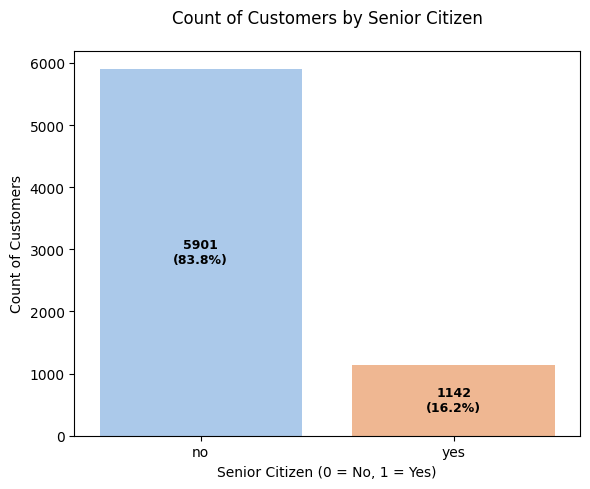

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x="SeniorCitizen", data=df, hue="SeniorCitizen", palette="pastel", legend=False)

# Calculate percentages
total = len(df)

# Add text at center of bars without boxes
for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        count = int(bar.get_height())
        percentage = count / total * 100
        
        # Add text at center without box
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2,
                f'{count}\n({percentage:.1f}%)', 
                ha='center', va='center',
                fontweight='bold', fontsize=9,
                color='black')

plt.title("Count of Customers by Senior Citizen", pad=20)
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count of Customers')
plt.tight_layout()
plt.show()

# Comparative a greated  percentage of people in senior citizen category have churned

<Figure size 600x600 with 0 Axes>

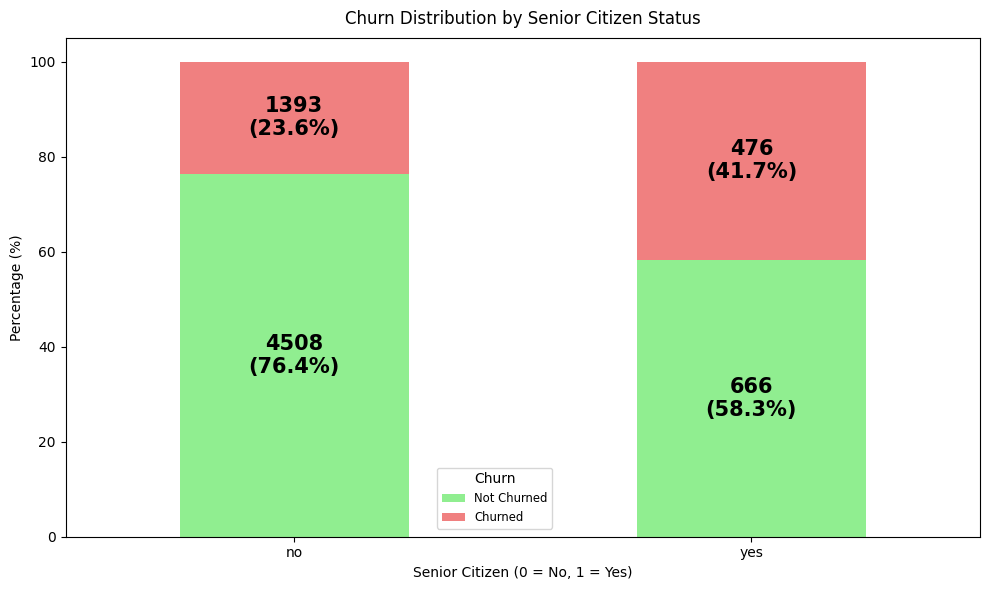

In [ ]:
plt.figure(figsize=(6, 6))

# Create cross-tabulation with percentages AND counts
cross_tab_percent = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
cross_tab_count = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Plot the stacked bar chart
cross_tab_percent.plot(kind='bar', 
               stacked=True, 
               color=['lightgreen', 'lightcoral'],
               figsize=(10, 6))

plt.title('Churn Distribution by Senior Citizen Status', fontsize=12, pad=10)
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)', fontsize=10)
plt.ylabel('Percentage (%)', fontsize=10)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal

# FIXED LEGEND POSITION - smaller and placed in empty space
plt.legend(title='Churn', labels=['Not Churned', 'Churned'], 
           fontsize='small', frameon=True, 
           bbox_to_anchor=(0.4, 0.15), loc='upper left') # This is Square size of Churn(0.4 from right, 0.15 from Bottom)

# Add percentage AND count labels on each segment
for i, (idx, row_percent) in enumerate(cross_tab_percent.iterrows()):
    cumulative = 0
    for j, (churn_value, percentage) in enumerate(row_percent.items()):
        count = cross_tab_count.iloc[i, j]  # Get the actual count
        if percentage > 0:  # Only label segments with >0%
            plt.text(i, cumulative + percentage/2, 
                    f'{count}\n({percentage:.1f}%)', 
                    ha='center', va='center',
                    fontweight='bold', fontsize=15, #Numbers which are writes in colourfull squares
                    color='black')
        cumulative += percentage

plt.tight_layout()
plt.show()

In [ ]:
#comparative a greator percentage of people in senior ciizen category have churned

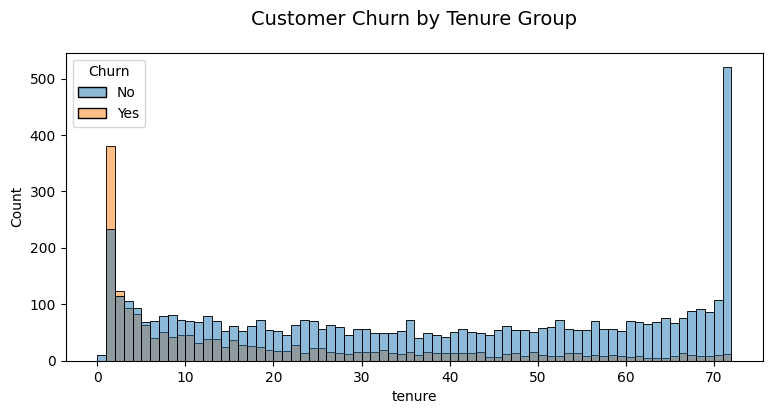

'\n*********************************\nplt.figure(figsize=(16, 6))\n\n# Create the countplot for each month (tenure)\nax = sns.countplot(x=\'tenure\', data=df, hue=\'Churn\', palette=[\'#66b3ff\',\'#ff9999\'])\n\nplt.title("Month-Wise Customer Churn Analysis", fontsize=16, pad=20)\nplt.xlabel(\'Tenure (Months)\')\nplt.ylabel(\'Number of Customers\')\nplt.legend(title=\'Churn Status\', labels=[\'Retained\', \'Churned\'])\nplt.tight_layout()\n\n# --- Data Table for the Boss ---\nprint("MONTH-WISE CHURN ANALYSIS")\nprint("-" * 50)\nprint(f"{\'Month\':<6} {\'Total\':<8} {\'Retained\':<10} {\'Churned\':<8} {\'Churn %\':<10}")\nprint("-" * 50)\n\n# Calculate and print values for each month\nfor month in range(0, 73):\n    month_data = df[df[\'tenure\'] == month]\n    total = len(month_data)\n    if total > 0:\n        churned = len(month_data[month_data[\'Churn\'] == \'Yes\'])\n        retained = total - churned\n        churn_pct = (churned / total) * 100\n        print(f"{month:<6} {total:<

In [ ]:

plt.figure(figsize=(9, 4))
plt.title("Customer Churn by Tenure Group", fontsize=14, pad=20)
sns.histplot(x = "tenure" , data = df, bins = 72, hue = "Churn" )
plt.show()
"""

plt.figure(figsize=(12, 5))

# Create tenure groups for better analysis
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 48, 72], labels=['0-12 Months', '13-48 Months', '49+ Months'])

# Plot using the new groups
ax = sns.countplot(x='TenureGroup', data=df, hue='Churn', order=['0-12 Months', '13-48 Months', '49+ Months'])

# Calculate totals and percentages for the grouped plot
tenure_totals = df['TenureGroup'].value_counts().sort_index()
churn_counts = df[df['Churn'] == 'Yes']['TenureGroup'].value_counts().sort_index()
no_churn_counts = df[df['Churn'] == 'No']['TenureGroup'].value_counts().sort_index()

# Function to add labels with both count and percentage
def add_labels(containers, counts, totals):
    for i, container in enumerate(containers):
        labels = []
        for j, _ in enumerate(container.datavalues):
            count = counts.iloc[j]
            total = totals.iloc[j]
            percentage = (count / total) * 100
            labels.append(f'{count}\n({percentage:.1f}%)')
        ax.bar_label(container, labels=labels, fontsize=9, padding=2)

# Add labels
add_labels([ax.containers[0]], no_churn_counts, tenure_totals)
add_labels([ax.containers[1]], churn_counts, tenure_totals)

plt.title("Customer Churn by Tenure Group", fontsize=14, pad=20)
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status')
plt.tight_layout()
plt.show()
"""
"""
*********************************
plt.figure(figsize=(16, 6))

# Create the countplot for each month (tenure)
ax = sns.countplot(x='tenure', data=df, hue='Churn', palette=['#66b3ff','#ff9999'])

plt.title("Month-Wise Customer Churn Analysis", fontsize=16, pad=20)
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status', labels=['Retained', 'Churned'])
plt.tight_layout()

# --- Data Table for the Boss ---
print("MONTH-WISE CHURN ANALYSIS")
print("-" * 50)
print(f"{'Month':<6} {'Total':<8} {'Retained':<10} {'Churned':<8} {'Churn %':<10}")
print("-" * 50)

# Calculate and print values for each month
for month in range(0, 73):
    month_data = df[df['tenure'] == month]
    total = len(month_data)
    if total > 0:
        churned = len(month_data[month_data['Churn'] == 'Yes'])
        retained = total - churned
        churn_pct = (churned / total) * 100
        print(f"{month:<6} {total:<8} {retained:<10} {churned:<8} {churn_pct:<10.1f}")
    else:
        print(f"{month:<6} {0:<8} {0:<10} {0:<8} {0:<10}")

plt.show()    
"""  

People who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned

<Figure size 800x500 with 0 Axes>

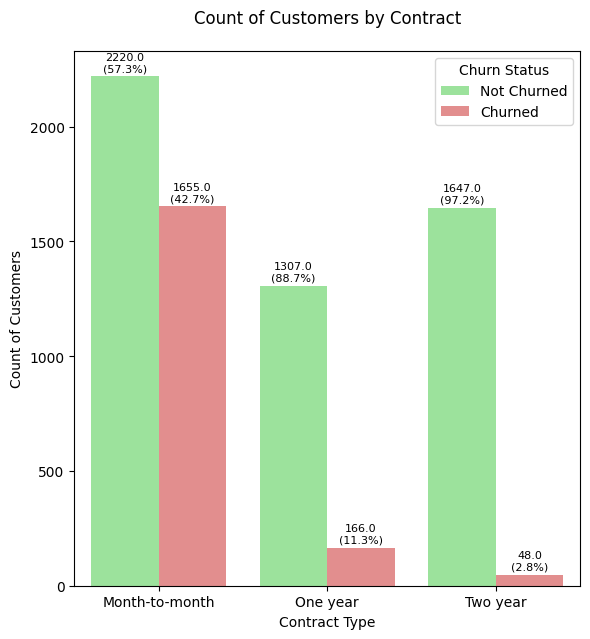

In [ ]:
"""
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show() 
"""
#
#
"""
plt.figure(figsize=(7, 5))
ax = sns.countplot(x="Contract", data=df, hue="Churn", palette=["lightgreen", "lightcoral"])

# Add percentage labels
for container in ax.containers:
    labels = []
    for j, count in enumerate(container.datavalues):
        contract_type = ax.get_xticklabels()[j].get_text()
        total_per_contract = len(df[df['Contract'] == contract_type])
        percentage = (count / total_per_contract) * 100
        labels.append(f'{percentage:.1f}%')
    
    ax.bar_label(container, labels=labels, fontsize=9, padding=2)

plt.title("Churn Rate by Contract Type (%)", pad=20)
plt.xlabel('Contract Type')
plt.ylabel('Count of Customers')
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned'])
plt.tight_layout()
plt.show()
"""
#
#Boss can you give me also value
plt.figure(figsize=(8, 5))
plt.figure(figsize=(6, 6.5))
ax = sns.countplot(x="Contract", data=df, hue="Churn", palette=["lightgreen", "lightcoral"])

# Add both COUNT and PERCENTAGE labels
for container in ax.containers:
    labels = []
    for j, count in enumerate(container.datavalues):
        contract_type = ax.get_xticklabels()[j].get_text()
        total_per_contract = len(df[df['Contract'] == contract_type])
        percentage = (count / total_per_contract) * 100
        labels.append(f'{count}\n({percentage:.1f}%)')  # Both count and percentage
    
    ax.bar_label(container, labels=labels, fontsize=8, padding=2)

plt.title("Count of Customers by Contract", pad=20)
plt.xlabel('Contract Type')
plt.ylabel('Count of Customers')
plt.legend(title='Churn Status', labels=['Not Churned', 'Churned'])
plt.tight_layout()
plt.show()

People who have month to month contract are likely to churn then from those who have 1 or 2 years or cntract.

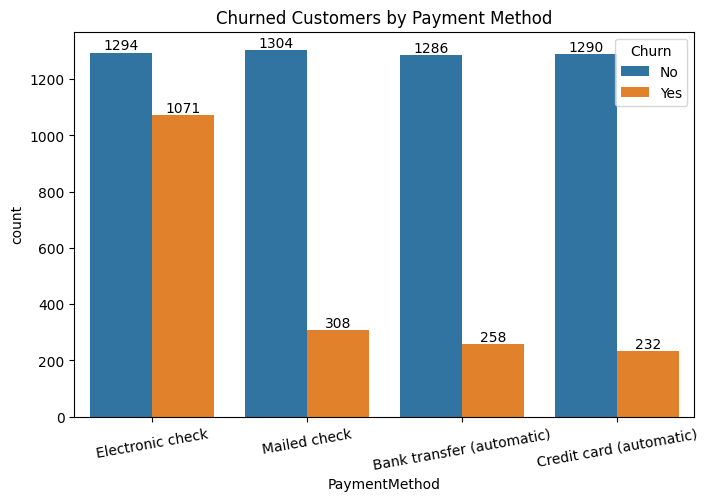

In [ ]:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 10)
plt.show()

# Customer is liikely to churn when he is using electronic check as a pyment method.

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies',
these are the columns and I want to create subplots from this data dwhere each plot would be a countplot


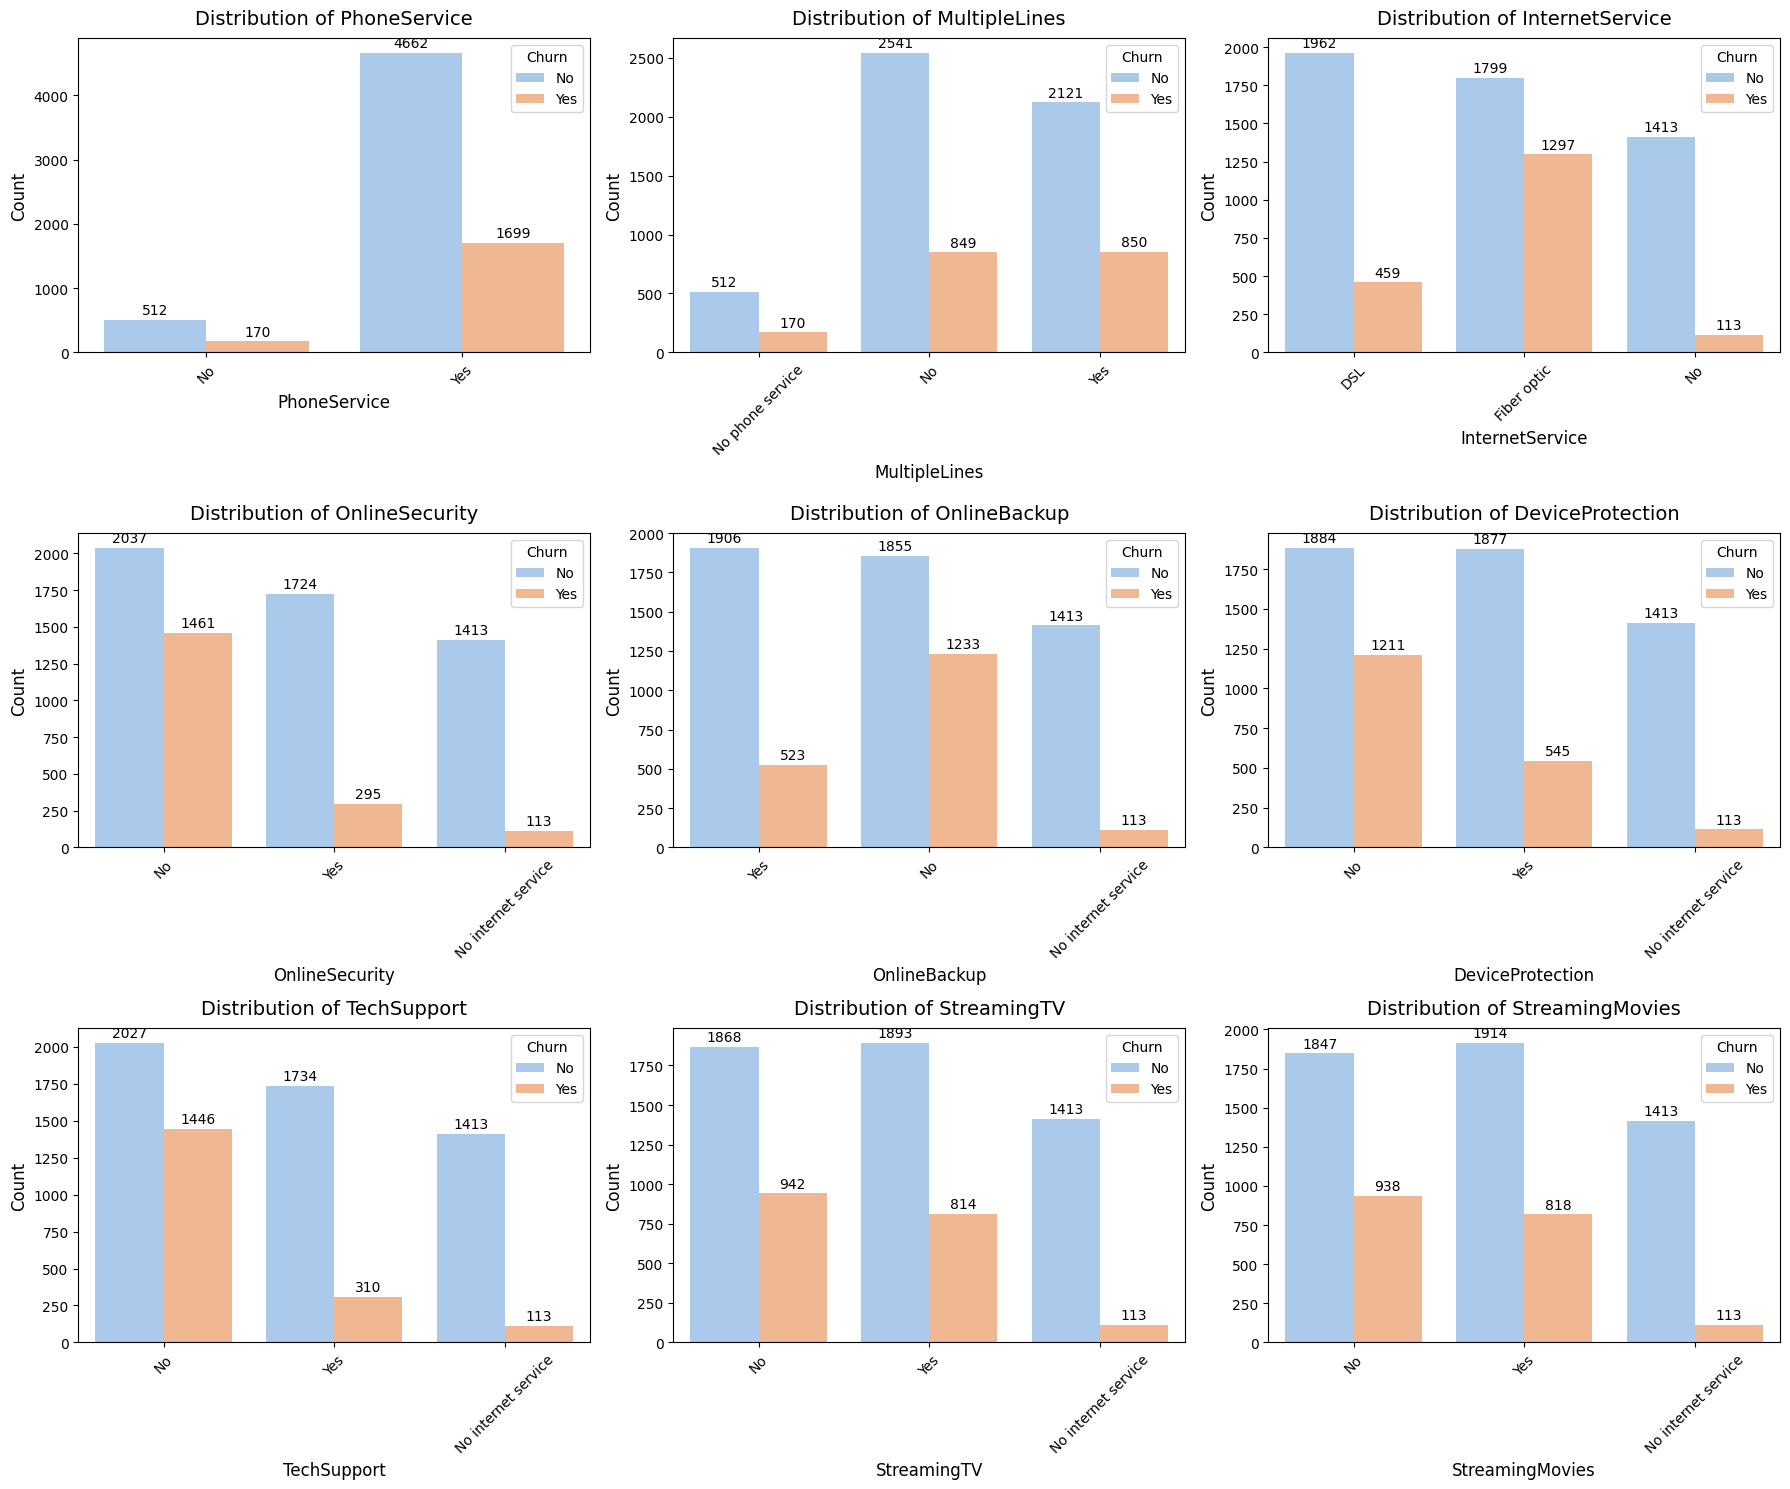

In [ ]:
# List of columns to plot
columns_to_plot = ['PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

# Calculate grid size (3 columns, enough rows)
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Round up division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# Create a countplot for each column
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=df, ax=axes[i], palette='pastel', hue = df["Churn"])
    #sns.countplot(x=column, data=df, ax=axes[i], palette='pastel')
    axes[i].set_title(f'Distribution of {column}', fontsize=14, pad=10)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    
    # Rotate x-labels if they're too long
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for container in axes[i].containers:
        axes[i].bar_label(container, fontsize=10, padding=2)

# Hide any empty subplots
for j in range(len(columns_to_plot), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()